# <u>K-Means Clustering With Wine Compound Data</u>

Clustering is a machine learning technique used to group data points into clusters/classes based on their similarity to each other. It is an example of unsupervised learning, because the model is trained without class labels (often because there are none). There are 4 main types of clustering algorithms: density-based, distribution-based, centroid-based (e.g. K-means), and hierarchical clustering (if you expect many sets of subgroups). Clustering has many uses: grouping customer/market behaviour, finding genomic clusters, anomaly detection, and much more.

Dataset is from Kaggle: https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering?rvi=1 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
plt.figure(figsize=(8, 6))

C:\Users\Nathan\AppData\Local\Temp\ipykernel_7808\1850182730.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [3]:
# reading the data
data = pd.read_csv("wine-clustering.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Exploration

In [4]:
data.shape

(178, 13)

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
# checking for null values
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

## Data Preparation

Before we create a model, we need to scale and shift the data. Since there are 13 variables, creating a model with all the variables will result in an overfitted model. We can use Principal Component Analysis (PCA) to reduce the number of dimensions that we will work with.

More info about PCA: https://builtin.com/data-science/step-step-explanation-principal-component-analysis 

In [7]:
# scaling data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

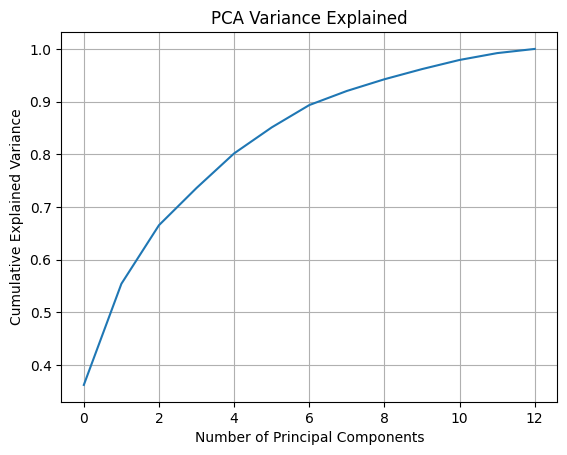

In [8]:
# creating a plot that shows cumulative variance for each principle component
pca = PCA()
pca.fit(scaled_data)
explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(np.cumsum(explained_variance_ratio))

plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Variance Explained')
plt.grid(True)
plt.show()

According to plot above, using 2 principal components should explain about 2/3rds of the variance.

In [9]:
# PCA with 2 principal components
pca = PCA(n_components=2)
pca.fit(scaled_data)
data_pca = pca.transform(scaled_data)
data_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

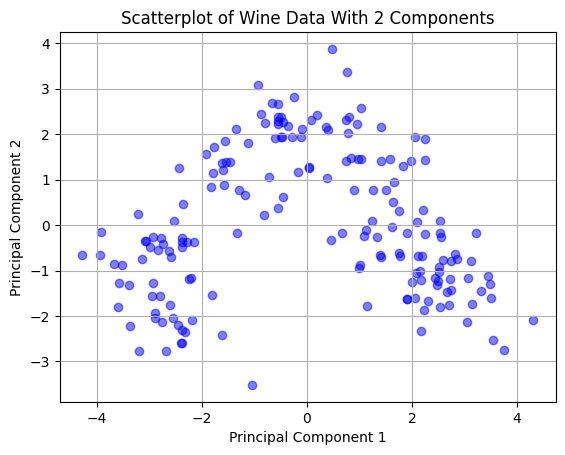

In [10]:
# creating a scatterplot with 2 principal components
x_values = data_pca[:, 0]
y_values = data_pca[:, 1]

plt.scatter(x_values, y_values, color='blue', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatterplot of Wine Data With 2 Components')
plt.grid(True)
plt.show()

## Determining Number of Clusters

### Elbow Method

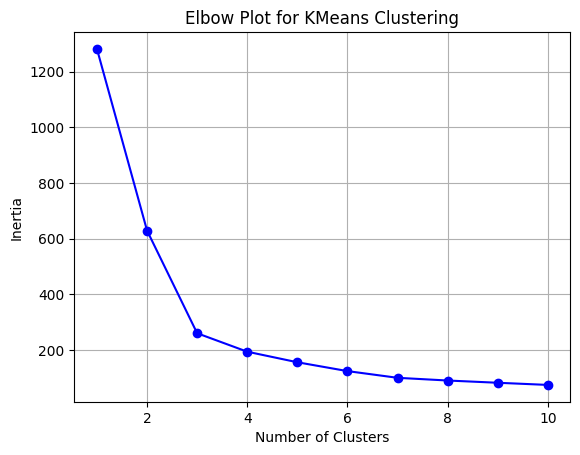

In [11]:
# Calculate inertia for different numbers of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=15, n_init=10)
    kmeans.fit(data_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to determine number of clusters
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')

plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Plot for KMeans Clustering')
plt.grid(True)
plt.show()

From the elbow plot above, the elbow is at 3, so there should be 3 clusters.

Note to self: if there isn't a clear elbow, use another method (e.g. silhouette method/gap statistic method)

### Silhouette Method

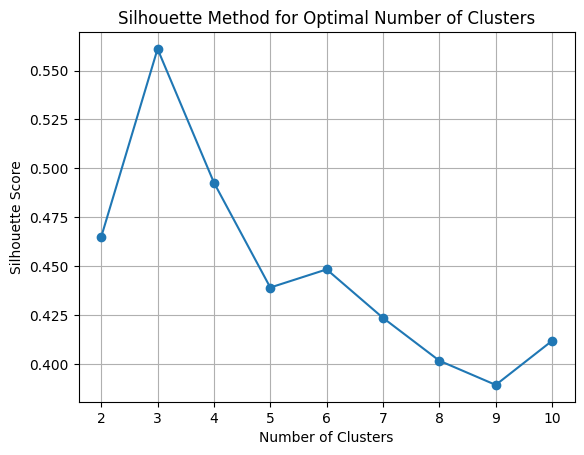

In [15]:
from sklearn.metrics import silhouette_score

cluster_range = range(2, 11)
silhouette_scores = []

# calculate silhouette score for each number of clusters
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=15, n_init=10)
    cluster_labels = kmeans.fit_predict(data_pca)
    
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# plot the silhouette scores
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal Number of Clusters')
plt.grid(True)
plt.show()

We choose the number of clusters with the highest silhouette score, which is also 3.

## Creating Clustering Model with 3 Clusters

In [13]:
# kmeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, init="k-means++", random_state=15, n_init=10)
kmeans.fit(data_pca)

kmeans_df = pd.DataFrame(data_pca)
kmeans_df.columns = ["Component 1", "Component 2"]
kmeans_df["Cluster"] =  kmeans.labels_
kmeans_df.head()

,Component 1,Component 2,Cluster
0,3.316751,-1.443463,1
1,2.209465,0.333393,1
2,2.516740,-1.031151,1
3,3.757066,-2.756372,1
4,1.008908,-0.869831,1


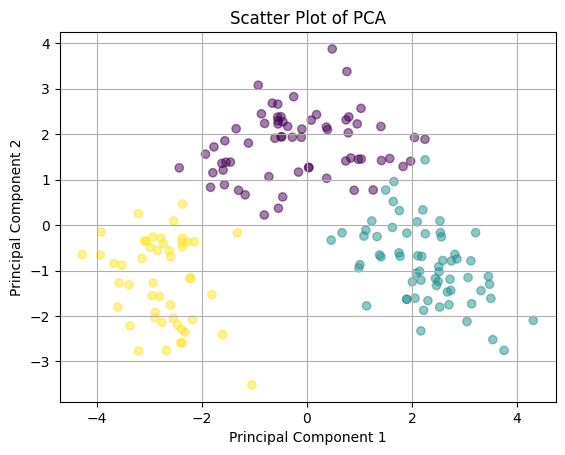

In [14]:
# plotting the clusters
x_values = kmeans_df["Component 1"]
y_values = kmeans_df["Component 2"]

plt.scatter(x_values, y_values, c=kmeans_df["Cluster"], alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA')
plt.grid(True)
plt.show()

So it turns out that the data from Kaggle originally came from a classification dataset (i.e. it had labels) which had 3 labels. So choosing 3 clusters was correct in this case, but often times there isn't a correct number of cluster; it depends on the situation.